# Electric Vehicle Market Segmentation

***objective***: Working under an Indian Electric Vehicle Startup, which is still in its early phase deciding in which vehicle/customer space it will develop its EVs. In this project I need to perform segmentation analysis and come up with a feasable strategy for the company to enter the market, targeting segments that will most likely use the Electric Vechiles.

Key Points covered: finding out which segment(2-wheelers,3-wheelers,4-wheelers,buses) of vehicles are most demanded by consumers as well as most profitable for the company. in that target segment of vehicle type we need to analyse the customer segmentation on the basis of demographic, psychographic, behavioral segmetation.

**Performing analysis on the dataset for Vechicle segmentation**

**Importing necessary libs**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio #for saving plotted images into local file for report purpose
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import warnings

In [2]:
warnings.filterwarnings("ignore")

**Loading Dataset of ev types containing information of sales of different vehicle type through the year 2017 to 2023**

In [3]:
evsales_data=pd.read_excel("smev_data.xlsx", sheet_name=None)

**Dala exploration**

In [4]:
# quicklook of sales data dictionary keys to find dataset containing "year wise vehicles sold during each financial year"
evsales_data.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

In [5]:
#"EV Market"
#loading dataset containing total revenue generated by each e-vehicle type
evmarket_df=evsales_data["EV Market"]

In [6]:
evmarket_df

,Category,Amount INR Cr
0,E-2 Wheelers,2464.27
1,E-3 Wheelers,351.21
2,E-4 Wheelers,114.65
3,E-Buses,687.93


**visualizing total revenue made by each of the vehicle types**

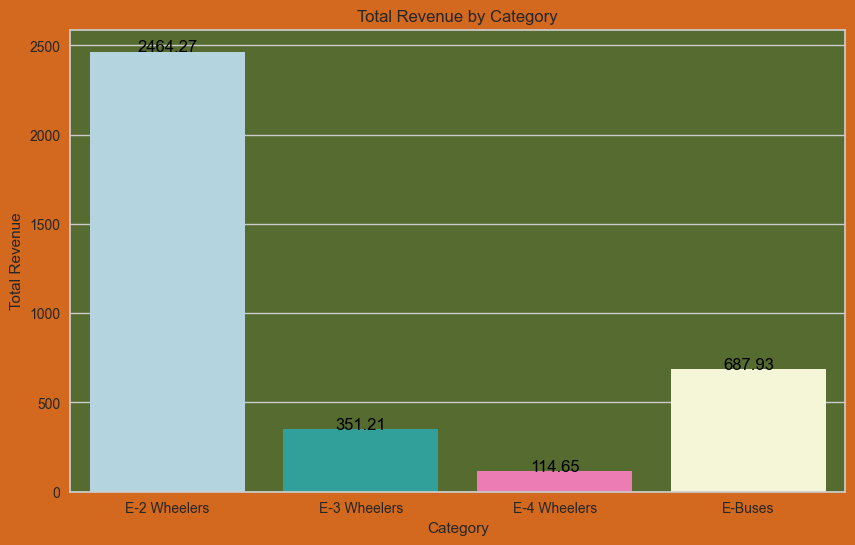

In [7]:
plt.figure(figsize=(10, 6), facecolor="chocolate")
bar_plot = sns.barplot(
    x='Category',
    y='Amount INR Cr',
    data=evmarket_df,
    palette=['lightblue', 'lightseagreen', 'hotpink', 'lightgoldenrodyellow']
)

# Annotate the bars with the amount
for index, row in evmarket_df.iterrows():
    bar_plot.text(index, row['Amount INR Cr'], round(row['Amount INR Cr'], 2), color='black', ha="center")

# Add titles and labels
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
bar_plot.set_facecolor('darkolivegreen')

# Save the plot as a PNG file
plt.savefig("total_revenuebar_seaborn.png")

# Show the plot
plt.show()

In [8]:
#it can be clearly visualized that the highest revenue is generated by 2 wheeler evs followed by e-buses,3wheelers, 4 wheelers.
#let us visualize more

**plotting visualization of sales growth of each e-vehicle types over the years**

In [9]:
#EV Industries is our dataset
#loading df
evsales_df=evsales_data["EV Industries"]

In [10]:
evsales_df

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-3 Wheelers,2017-18,91970
7,E-3 Wheelers,2018-19,116031
8,E-3 Wheelers,2019-20,143051
9,E-3 Wheelers,2020-21,90898


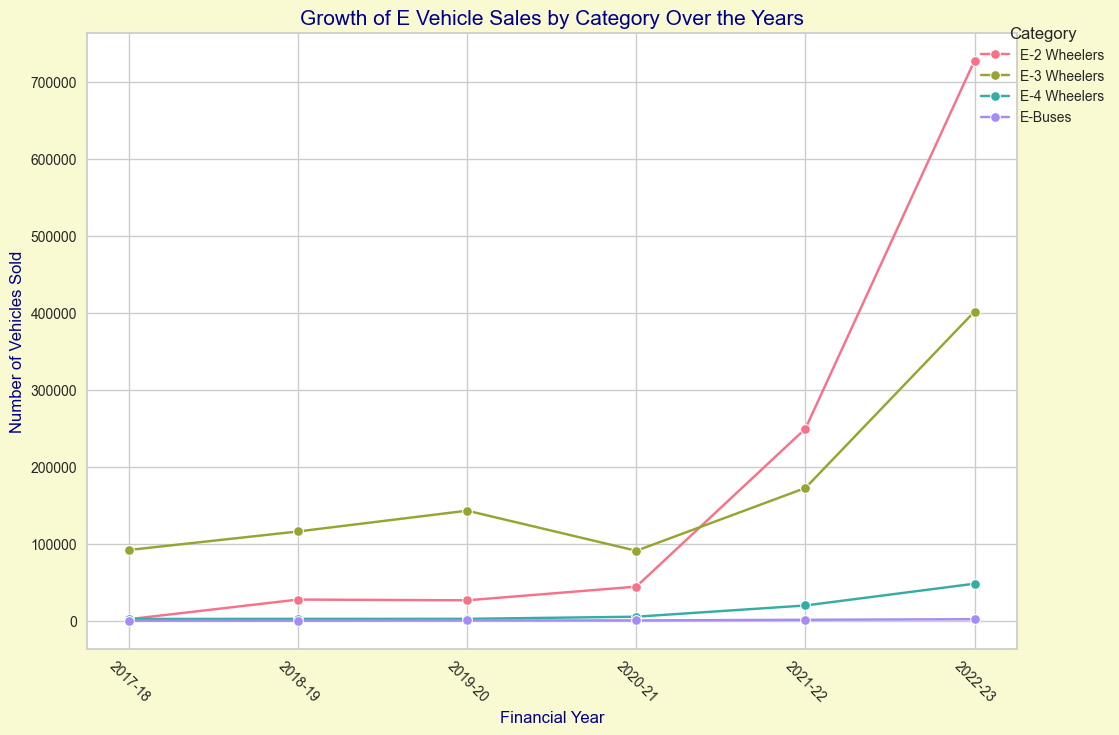

In [11]:
plt.figure(figsize=(12, 8), facecolor='lightgoldenrodyellow')

# Create the line plot for each category
categories = evsales_df['category'].unique()
palette = sns.color_palette("husl", len(categories))

for category, color in zip(categories, palette):
    category_data = evsales_df[evsales_df['category'] == category]
    sns.lineplot(
        x='financial_year',
        y='num_vehicles',
        data=category_data,
        marker='o',
        label=category,
        color=color
    )

# Customize the plot's appearance
plt.title('Growth of E Vehicle Sales by Category Over the Years', fontsize=15, color='darkblue')
plt.xlabel('Financial Year', fontsize=12, color='darkblue')
plt.ylabel('Number of Vehicles Sold', fontsize=12, color='darkblue')
plt.xticks(rotation=-45)
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.1, 1.02), borderaxespad=0.)

# Save the plot as a PNG file
plt.savefig("sales_growth_category_seaborn.png")

# Show the plot
plt.show()

In [12]:
#as stated above in the lineplot , the 2 wheeler segment really skyrocketed in terms of growth aspect over the years.
#following it is the 3 wheelers ev, definitly rise of e-rickshaw over cabs are preferred by passengers often,for short distance,
#and it is also cheaper

In [13]:
evsales_data.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

In [14]:
#getting all the dataset containing 2wheeler information to perform segmentation since we already found that among all
#e-vehicle types, two wheelers are sold most as well as generated highest revenue over the year 2019-2023.
#now we will do vehicle segmentation to find which of the e-two wheelers brand are going to be our target.

In [15]:
#combining all financial year data for 2 wheelers into one dataset
ev2w_data=list(evsales_data.keys())
ev2w_data=ev2w_data[0:4]

In [16]:
#checking specified list output
ev2w_data

['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23']

In [17]:
#concatenating rows of each financial years for 2wheelers sales into one dataframe
ev2w_df=pd.concat([evsales_data[ev2w_data[0]],
                  evsales_data[ev2w_data[1]],
                  evsales_data[ev2w_data[2]],
                  evsales_data[ev2w_data[3]]
                  ])

In [18]:
#checking concatenated dataframe of 2 wheelers for all financial years
ev2w_df

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,Hero Electric,0.30,Apr,1776
1,2019-20,Hero Electric,0.30,May,455
2,2019-20,Hero Electric,0.30,Jun,329
3,2019-20,Hero Electric,0.30,Jul,260
4,2019-20,Hero Electric,0.30,Aug,249
...,...,...,...,...,...
151,2022-23,OTHERS,0.08,Nov,5241
152,2022-23,OTHERS,0.08,Dec,5233
153,2022-23,OTHERS,0.08,Jan,5111
154,2022-23,OTHERS,0.08,Feb,5083


In [19]:
#checking unique categories of brands of ev-2wheelers 
ev2w_df.maker.unique()

array(['Hero Electric', 'Okinawa Autotech', 'Ather Energy',
       'Ampere Vehicles', 'Revolt', 'Others', 'Bajaj', 'Pure EV',
       'Benling', 'Jitendra', 'TVS', 'Ola Electric', 'OLA ELECTRIC',
       'OKINAWA', 'HERO ELECTRIC', 'AMPERE', 'ATHER', 'BAJAJ', 'OKAYA EV',
       'REVOLT', 'PURE EV', 'BEING INDIA', 'JITENDRA NEW EV', 'OTHERS'],
      dtype=object)

In [20]:
#we can see extra categories under same brand so we will merge those brand extensions into their respective brands,
#since it is redundant.
ev2w_df["maker"]= ev2w_df['maker'].replace({'Ampere Vehicles':'AMPERE',
                                            'Ather Energy':'ATHER',
                                            'BEING INDIA':'Benling',
                                            'JITENDRA NEW EV':'Jitendra',
                                            'Okinawa Autotech':'OKINAWA',
                                            "Others":"OTHERS",
                                            "Hero Electric":"HERO ELECTRIC",
                                            "Bajaj":"BAJAJ",
                                            "Ola Electric":"OLA ELECTRIC"})

In [21]:
ev2w_df.maker.unique()

array(['HERO ELECTRIC', 'OKINAWA', 'ATHER', 'AMPERE', 'Revolt', 'OTHERS',
       'BAJAJ', 'Pure EV', 'Benling', 'Jitendra', 'TVS', 'OLA ELECTRIC',
       'OKAYA EV', 'REVOLT', 'PURE EV'], dtype=object)

In [22]:
#using groupby method for grouping brands with respective financial years and applying aggregate sum of total vehicles sold
ev2w_df_year=ev2w_df.groupby(['financial_year', 'maker']).agg({'num_vehicles':'sum'}).reset_index()


In [23]:
ev2w_df_year

,financial_year,maker,num_vehicles
0,2019-20,AMPERE,2518
1,2019-20,ATHER,2905
2,2019-20,HERO ELECTRIC,7865
3,2019-20,OKINAWA,10135
4,2019-20,OTHERS,2026
5,2019-20,Revolt,1063
6,2020-21,AMPERE,6089
7,2020-21,ATHER,4401
8,2020-21,BAJAJ,1470
9,2020-21,Benling,1108


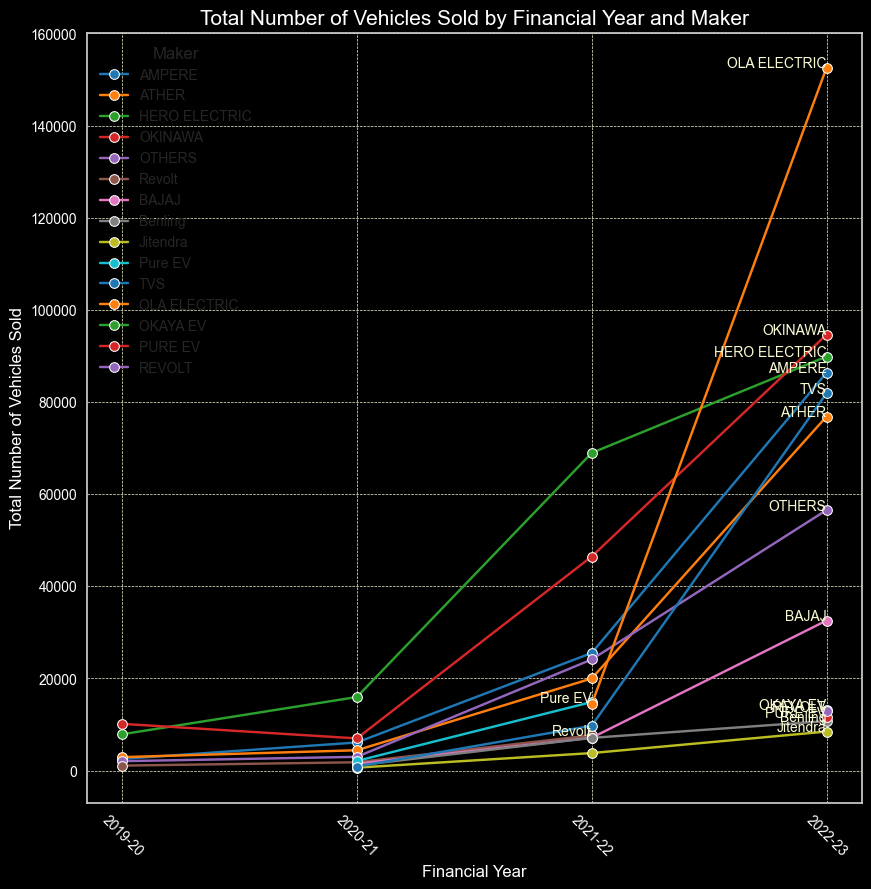

In [24]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the plot
plt.figure(figsize=(10, 10), facecolor='black')

# Get current axes to modify
ax = plt.gca()
ax.set_facecolor('black')

# Plot each maker
makers = ev2w_df_year['maker'].unique()
for i, maker in enumerate(makers):
    maker_data = ev2w_df_year[ev2w_df_year['maker'] == maker]
    sns.lineplot(
        x='financial_year',
        y='num_vehicles',
        data=maker_data,
        marker='o',
        label=maker,
        color=colors[i]
    )
    # Annotate the last point of each line
    plt.text(
        maker_data['financial_year'].iloc[-1],
        maker_data['num_vehicles'].iloc[-1],
        maker,
        fontsize=10,
        color='lightgoldenrodyellow',
        horizontalalignment='right'
    )

# Customize the plot's appearance
plt.title('Total Number of Vehicles Sold by Financial Year and Maker', fontsize=15, color='white')
plt.xlabel('Financial Year', fontsize=12, color='white')
plt.ylabel('Total Number of Vehicles Sold', fontsize=12, color='white')
plt.xticks(rotation=-45, color='white')
plt.yticks(color='white')
plt.legend(title='Maker', loc='upper left', bbox_to_anchor=(0.01, 0.99), borderaxespad=0., facecolor='white', framealpha=1, edgecolor='white')
plt.grid(True, color='lightgoldenrodyellow', linestyle='--', linewidth=0.5)

# Save the plot as a PNG file
plt.savefig("total_evsales_fy_seaborn.png", facecolor='black')

# Show the plot
plt.show()

**2Wheeler target brand conclusion: Ola Electric emerges as market leader**

In [25]:
#As we earlier find out that among 4 e-vehicle types, the sales and revenue of 2 wheelers are highest across many years,
#so on that basis we plotted 2 wheelers to find out which of the brands perform optimum in the available segments.
#we found out that Ola Electric 2 wheelers are highest especially the uptrend from fy21-22 to fy22-23 just skyrocketed.
#contributing 152.567k to the market.
#following the ola electric, theres okinawa and hero electric also holding 2nd and 3rd place respectively.
#amber, TVS,and ather also follows within the same range.

#

# Market/Customer Segmentation

***E-2Wheeler Market & Customer Segmentation as we discovered it as our target segment among different vehicle types***

In [26]:
#Objective:
#Now since we identified our target segment evehicle type i.e, e-2Wheelers, so it is time to analyse Customer Segmentation.
#I will be using 2 different datasets for this.
    #Dataset containing E-2Wheelers information containing price and technical specs.
    #Dataset containing Customer user reviews of E-2Wheelers.

**Loading Vehicle specs dataset**

In [27]:
ev_specs=pd.read_csv("ev_model_spec.csv")

In [28]:
ev_specs.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [29]:
ev_specs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Model Name                   39 non-null     object
 1   Price                        39 non-null     int64 
 2   Riding Range (km)            39 non-null     int64 
 3   Top Speed (kmph)             39 non-null     int64 
 4   Weight (kg)                  39 non-null     int64 
 5   Battery Charging Time (hrs)  39 non-null     int64 
 6   Rated Power (W)              39 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.3+ KB


**Loading Customer Reviews Dataset**

In [30]:
ev_reviews=pd.read_csv("ev2_bikewale.csv")

In [31]:
ev_reviews.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [32]:
ev_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         844 non-null    object 
 2   Owned for           844 non-null    object 
 3   Ridden for          668 non-null    object 
 4   rating              844 non-null    int64  
 5   Visual Appeal       739 non-null    float64
 6   Reliability         716 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  703 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             530 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     390 non-null    float64
 13  Model Name          844 non-null    object 
dtypes: float64(8), int64(1), object(5)
memory usage: 92.4+ KB


In [33]:
#checking similar columns in both dataframes
print("ev_specs:\n",ev_specs.columns,"\n\nev_reviews:\n",ev_reviews.columns)

ev_specs:
 Index(['Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)'],
      dtype='object') 

ev_reviews:
 Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name'],
      dtype='object')


In [34]:
ev_specs["Model Name"].unique()

array(['Ampere Magnus EX', 'Ampere Magnus Pro', 'Ampere REO',
       'Ampere Zeal', 'Ather 450X', 'Bajaj Chetak', 'Benling Aura',
       'BGauss B8', 'Bounce Infinity E1', 'e-bike Gen Nxt', 'Evolet Polo',
       'Gemopai Astrid Lite', 'Gemopai Ryder', 'Hero Electric Atria',
       'Hero Electric Flash', 'Hero Electric NYX', 'Hero Electric NYX HX',
       'Hero Electric Optima', 'Hero Electric Optima CX',
       'Hero Electric Photon', 'Joy e-bike Monster', 'Joy e-bike Wolf',
       'Odysse Evoqis', 'Okinawa i-Praise', 'Okinawa Lite',
       'Okinawa Praise', 'Okinawa R30', 'Okinawa Ridge Plus', 'OLA S1',
       'OLA S1 Pro', 'PURE EV EPluto 7G', 'PURE EV ETrance Neo',
       'Revolt RV 300', 'Revolt RV 400', 'Techo Electra Emerge',
       'Techo Electra Raptor', 'Tork Kratos', 'TVS iQube', 'Yo Drift'],
      dtype=object)

In [35]:
ev_reviews["Model Name"].unique()

array(['TVS iQube', 'Revolt RV 400', 'Bajaj Chetak', 'OLA S1 Pro',
       'Ather 450X', 'Hero Electric Optima', 'Tork Kratos', 'OLA S1',
       'Bounce Infinity E1', 'Hero Electric Optima CX',
       'Hero Electric Flash', 'Ampere Magnus EX', 'Revolt RV 300',
       'Hero Electric Photon', 'Okinawa Praise', 'Benling Aura',
       'Ampere Magnus Pro', 'PURE EV EPluto 7G', 'Ampere REO',
       'Odysse Evoqis', 'Hero Electric NYX HX', 'Okinawa i-Praise',
       'Joy e-bike Monster', 'PURE EV ETrance Neo', 'Evolet Polo',
       'Okinawa Ridge Plus', 'Ampere Zeal', 'Hero Electric Atria',
       'Okinawa Lite', 'Hero Electric NYX', 'Okinawa R30', 'Yo Drift',
       'BGauss B8', 'Joy e-bike Wolf', 'Gemopai Astrid Lite',
       'Techo Electra Emerge', 'Techo Electra Raptor', 'e-bike Gen Nxt',
       'Gemopai Ryder'], dtype=object)

**Merging both dataset**

In [36]:
#since, both the dataset are needed for market segmentation and both have one common col "Model Name", 
#we will merge these two dataframes for performing analysis and segmentation on final dataset.
ev_merged_df=ev_reviews.merge(ev_specs, how="right", on="Model Name")

#

# Data Exploration

In [37]:
ev_merged_df.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Specification is very good\nFuel save is 300% ...,Everything,Never owned,NaN,5,4.0,4.0,4.0,4.0,5.0,NaN,4.0,NaN,Ampere Magnus EX,104758,121,53,90,7,1200
1,Less buying cost.. I bought around 78k... Rang...,Daily Commute,< 3 months,< 5000 kms,4,4.0,3.0,4.0,3.0,3.0,NaN,3.0,NaN,Ampere Magnus EX,104758,121,53,90,7,1200
2,1. Buying experience is very excellent\n2. Rid...,Daily Commute,< 3 months,< 5000 kms,5,4.0,NaN,5.0,NaN,4.0,NaN,4.0,NaN,Ampere Magnus EX,104758,121,53,90,7,1200
3,The vehicle was not good routine usage. The ba...,Daily Commute,> 1 yr,5000-10000 kms,1,3.0,1.0,2.0,3.0,1.0,NaN,3.0,NaN,Ampere Magnus EX,104758,121,53,90,7,1200
4,Recently i have purchased a magnus ex bike fro...,Daily Commute,< 3 months,< 5000 kms,3,4.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,Ampere Magnus EX,104758,121,53,90,7,1200


In [38]:
ev_merged_df.shape

(844, 20)

In [39]:
ev_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [40]:
#checking null values
ev_merged_df.isnull().sum().sort_values(ascending=False)

Maintenance cost               664
Extra Features                 659
Performance                    499
Value for Money                454
Comfort                        314
Ridden for                     176
Service Experience             141
Reliability                    128
Visual Appeal                  105
review                          47
Used it for                      0
rating                           0
Owned for                        0
Model Name                       0
Price                            0
Riding Range (km)                0
Top Speed (kmph)                 0
Weight (kg)                      0
Battery Charging Time (hrs)      0
Rated Power (W)                  0
dtype: int64

In [41]:
#there are many missing values. we need to handle them first.


In [42]:
ev_merged_df.review

0      Specification is very good\nFuel save is 300% ...
1      Less buying cost.. I bought around 78k... Rang...
2      1. Buying experience is very excellent\n2. Rid...
3      The vehicle was not good routine usage. The ba...
4      Recently i have purchased a magnus ex bike fro...
                             ...                        
839    I have ridded more other electronic bikes... B...
840    Everything ,every brand every product of elect...
841    It's been 3 weeks since I am owning this, and ...
842    Hey , i am sujan roy from coochbehar .I have b...
843    My buying experience was good dealer explains ...
Name: review, Length: 844, dtype: object

In [43]:
#here, the reviews are obviously containing sentiment statements,
#so, to categorise review sentiments into positive, negative, and neutral we need to analyse market sentiments.
#for this we will be using Natural Langiage processing library "nltk"
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [44]:
s_a=SentimentIntensityAnalyzer() #to figure out if a review is expressing positive/negative/neutral emotion.
market_sentiments=[]
for text_sentiment in ev_merged_df["review"]:
    if pd.isna(text_sentiment):
        market_sentiments.append("neutral")
        continue
    senti_scores=s_a.polarity_scores(text_sentiment)
    pos_score=senti_scores["pos"]
    neg_score=senti_scores["neg"]
    
    if pos_score>neg_score:
        senti_text="positive"
    elif pos_score<neg_score:
        senti_text="negative"
    else:
        senti_text="neutral"
        
    market_sentiments.append(senti_text)
    
ev_merged_df["sentiments"]=market_sentiments #creating a new col that contains all sentiments based on customer reviews.

In [45]:
ev_merged_df.head(3)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiments
0,Specification is very good\nFuel save is 300% ...,Everything,Never owned,NaN,5,4.0,4.0,4.0,4.0,5.0,...,4.0,NaN,Ampere Magnus EX,104758,121,53,90,7,1200,positive
1,Less buying cost.. I bought around 78k... Rang...,Daily Commute,< 3 months,< 5000 kms,4,4.0,3.0,4.0,3.0,3.0,...,3.0,NaN,Ampere Magnus EX,104758,121,53,90,7,1200,positive
2,1. Buying experience is very excellent\n2. Rid...,Daily Commute,< 3 months,< 5000 kms,5,4.0,NaN,5.0,NaN,4.0,...,4.0,NaN,Ampere Magnus EX,104758,121,53,90,7,1200,positive


In [46]:
#checking value counts of each sentiment types
ev_merged_df.sentiments.value_counts()

positive    527
negative    264
neutral      53
Name: sentiments, dtype: int64

In [47]:
#now out of 21 features we will be selecting cols based on segmentation criteria and making a dataset with those cols.
ev_segment_df=ev_merged_df[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'sentiments']]

In [48]:
ev_segment_df.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiments
0,Everything,Never owned,NaN,5,4.0,4.0,4.0,4.0,5.0,NaN,4.0,NaN,positive
1,Daily Commute,< 3 months,< 5000 kms,4,4.0,3.0,4.0,3.0,3.0,NaN,3.0,NaN,positive
2,Daily Commute,< 3 months,< 5000 kms,5,4.0,NaN,5.0,NaN,4.0,NaN,4.0,NaN,positive
3,Daily Commute,> 1 yr,5000-10000 kms,1,3.0,1.0,2.0,3.0,1.0,NaN,3.0,NaN,positive
4,Daily Commute,< 3 months,< 5000 kms,3,4.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,positive


In [49]:
#dealing with NaN values in numerical columns
ev_segment_df=ev_segment_df.iloc[:,4:12] 
ev_segment_df=ev_segment_df.fillna(0)

In [50]:
ev_segment_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 59.3 KB


In [51]:
ev_segment_df.mean()

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

**Dimensionality Reduction using PCA**

In [52]:
#scaling for PCA
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ev_scale=ss.fit_transform(ev_segment_df)

In [53]:
pca=PCA(random_state=1)
pca.fit(ev_scale)

PCA(random_state=1)

In [54]:
ev_pca=pca.transform(ev_scale)

In [55]:
ev_pca_df=pd.DataFrame(ev_pca, columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8"])

In [56]:
ev_pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,-0.373407,4.082027,-1.039629,0.199422,0.139854,0.474270,-0.426869,0.237387
1,0.175781,2.902330,-0.248451,-0.157599,0.151292,0.131607,-0.013314,-0.207733
2,1.654849,3.473408,-0.375435,-1.488028,0.799178,-0.167972,-1.158085,-0.496822
3,1.135961,1.515073,-0.352069,0.130037,0.739896,-0.747038,0.578926,-0.163109
4,1.113412,0.187068,0.777873,-1.028624,-0.855904,0.396873,0.748850,-0.159009
...,...,...,...,...,...,...,...,...
839,-2.420871,-1.286327,-0.860596,0.137152,-0.116079,0.139621,0.337967,-0.244413
840,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328
841,-2.621569,-1.432327,-0.740728,0.127501,-0.033248,-0.002728,0.038894,-0.050442
842,-1.211517,-1.360354,-0.579120,0.097119,0.391478,-0.016786,-0.029846,-0.123412


In [57]:
#pca summary
ev_pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,844.0,3.367501e-17,1.845017,-2.621569,-1.482078,-0.367811,1.654503,3.133474
PCA2,844.0,-3.367501e-17,1.736646,-2.096126,-1.274924,-0.740586,0.615746,4.834473
PCA3,844.0,0.000000e+00,0.903486,-1.712889,-0.671561,-0.243866,0.154879,2.286791
PCA4,844.0,1.078653e-17,0.517750,-1.934388,-0.216703,0.145649,0.380629,2.185849
PCA5,844.0,-3.788439e-17,0.405239,-1.680414,-0.087058,-0.033248,0.149923,2.082553
PCA6,844.0,7.892581e-18,0.379558,-2.400780,-0.091776,0.015354,0.087681,2.537743
PCA7,844.0,2.420391e-17,0.337883,-1.330363,-0.134614,0.006612,0.133978,1.467890
PCA8,844.0,3.525353e-17,0.287510,-1.329112,-0.100179,0.011328,0.086361,1.512807


In [58]:
#making a dataframe that shows each components for our segment criterias respectively. 
#this will show us correlation between factor loading of a variable and a given Principal Component.
ev_pca_factors_load=pd.DataFrame(pca.components_, columns= ev_segment_df.columns, index=ev_pca_df.columns)

In [59]:
ev_pca_factors_load=ev_pca_factors_load.T

In [60]:
ev_pca_factors_load

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065


**Visualizing PCA using scatter plot**

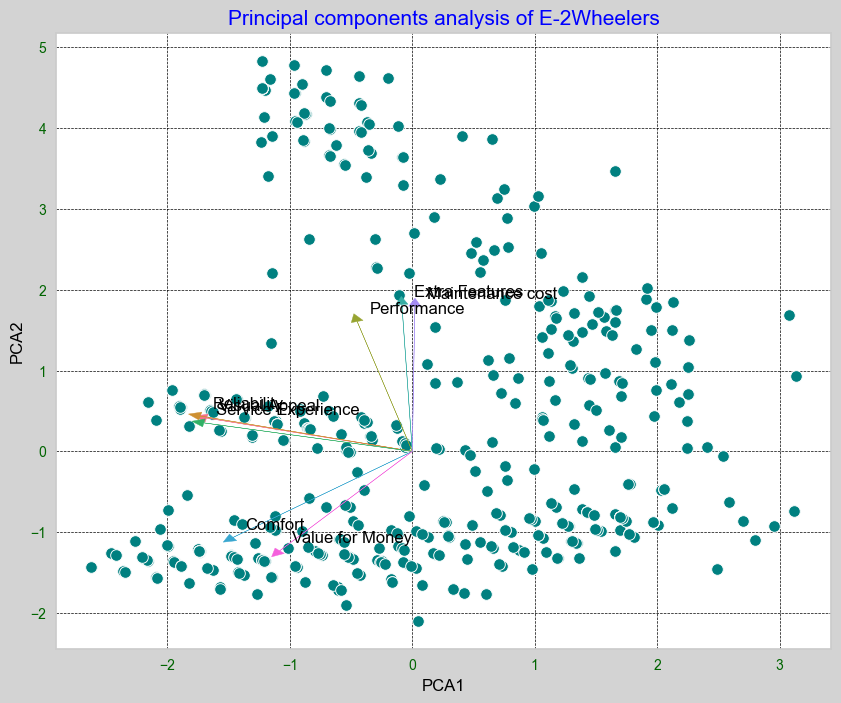

In [61]:
plt.figure(figsize=(10, 8), facecolor="lightgrey")
sns.scatterplot(x='PCA1', y='PCA2', data=ev_pca_df, color='teal', s=70)

# Plotting arrows from centroid to provided coordinates with index names
arrow_colors = sns.color_palette("husl", len(ev_pca_factors_load))
for i, factor in enumerate(ev_pca_factors_load.index):
    plt.arrow(0, 0, ev_pca_factors_load['PCA1'][i] * 3.5, ev_pca_factors_load['PCA2'][i] * 3.5, 
              head_width=0.1, head_length=0.1, color=arrow_colors[i])

# Annotating
for i, factor in enumerate(ev_pca_factors_load.index):
    plt.text(ev_pca_factors_load['PCA1'][i] * 3.5 + 0.1, ev_pca_factors_load['PCA2'][i] * 3.5 + 0.1, 
             factor, color='black')

# Customize the plot's appearance
plt.title('Principal components analysis of E-2Wheelers', fontsize=15, color='blue')
plt.xlabel('PCA1', fontsize=12, color='black')
plt.ylabel('PCA2', fontsize=12, color='black')
plt.xticks(color='darkgreen')
plt.yticks(color='darkgreen')
plt.grid(True, linestyle='--', linewidth=0.5, color='black')


# Save the plot as a PNG file
plt.savefig("PCA_E2wheelers_seaborn.png", facecolor='black')

# Show the plot
plt.show()

#

# Segment Extraction

**KMeans Clustering**

In [62]:
#KMeans
ev_km=[KMeans(n_clusters=k, random_state=1).fit(ev_scale) for k in range(2,9)] 

In [63]:
ev_km

[KMeans(n_clusters=2, random_state=1),
 KMeans(n_clusters=3, random_state=1),
 KMeans(n_clusters=4, random_state=1),
 KMeans(n_clusters=5, random_state=1),
 KMeans(n_clusters=6, random_state=1),
 KMeans(n_clusters=7, random_state=1),
 KMeans(random_state=1)]

In [64]:
#calculating within cluster sum of squares
wcss=[model.inertia_ for model in ev_km]

In [65]:
wcss

[4486.550730564804,
 2505.878889882658,
 1719.28208008331,
 1437.8400591811587,
 1155.8162672354988,
 1048.1597232040822,
 959.7717119593257]

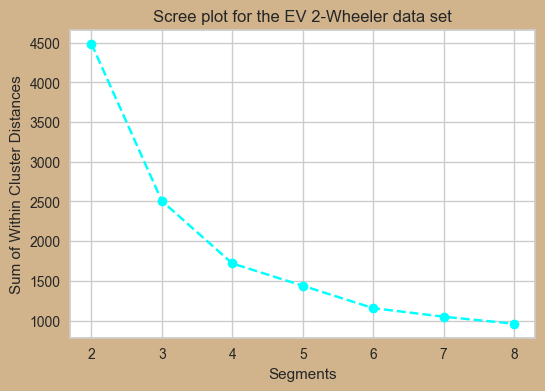

In [66]:
#plotting scree plot for elbow test
fig = plt.figure(figsize=(6, 4), facecolor="tan")

#Creating scree plot using a line plot
plt.plot(range(2, 9), wcss, marker='o', color='cyan', linestyle='--')

plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")

# Saving the plot as an image file in local system, for the purpose of including plots in reports.
plt.savefig("scree_plot_line.png")

plt.show()

In [67]:
wcss_diff = pd.DataFrame({'Segments':range(2,9),
                          'WCSS Difference': pd.Series(wcss).diff()}) #diff bw values for each row in wcss values

In [68]:
wcss_diff

,Segments,WCSS Difference
0,2,NaN
1,3,-1980.671841
2,4,-786.596810
3,5,-281.442021
4,6,-282.023792
5,7,-107.656544
6,8,-88.388011


In [69]:
#replacing nan value with zero in oth row 
wcss_diff['WCSS Difference'][0] = 0 

In [70]:
wcss_diff

,Segments,WCSS Difference
0,2,0.000000
1,3,-1980.671841
2,4,-786.596810
3,5,-281.442021
4,6,-282.023792
5,7,-107.656544
6,8,-88.388011


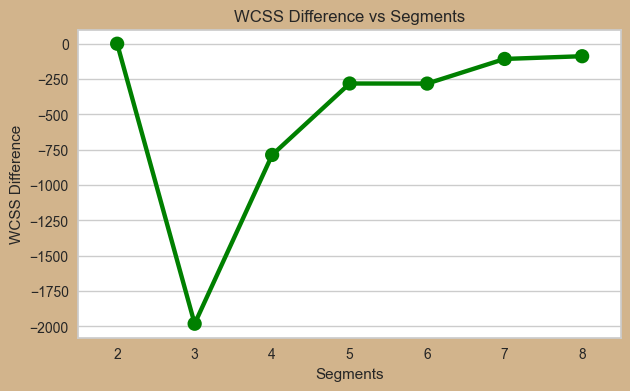

In [71]:
#creating pointplot for optimum elbow point for getting the optimal no. of segments
plt.figure(figsize=(7, 4), facecolor="tan")

#creating point plot
sns.pointplot(wcss_diff, x='Segments', y='WCSS Difference', color='green')

plt.xlabel("Segments")
plt.ylabel("WCSS Difference")
plt.title("WCSS Difference vs Segments")
plt.savefig("wcss_diff_pointplot.png")
plt.show()

In [72]:
#the above plot shows the exact optimal elbow point at 4. 
#this states that the optimal number of our segments is going to be four

In [73]:
ev_km

[KMeans(n_clusters=2, random_state=1),
 KMeans(n_clusters=3, random_state=1),
 KMeans(n_clusters=4, random_state=1),
 KMeans(n_clusters=5, random_state=1),
 KMeans(n_clusters=6, random_state=1),
 KMeans(n_clusters=7, random_state=1),
 KMeans(random_state=1)]

In [74]:
kmeans=ev_km[2] #or kmeans=KMeans(n_clusters=4)

In [75]:
ev_cluster_df=pd.DataFrame(ev_scale, columns=ev_segment_df.columns)

In [76]:
#assigning each instances to its respective cluster in our scaled dataframe containing all segments.
ev_cluster_df["clusters"]=kmeans.labels_

In [77]:
ev_cluster_df

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,clusters
0,0.389221,0.631486,1.289740,0.726720,3.039774,-1.104099,2.139619,-0.791825,3
1,0.389221,0.100106,1.289740,0.200238,1.644305,-1.104099,1.486513,-0.791825,3
2,0.389221,-1.494033,1.793928,-1.379209,2.342040,-1.104099,2.139619,-0.791825,3
3,-0.174248,-0.962653,0.281365,0.200238,0.248837,-1.104099,1.486513,-0.791825,2
4,0.389221,0.100106,0.281365,-1.379209,-0.448898,-1.104099,-0.472806,-0.791825,2
...,...,...,...,...,...,...,...,...,...
839,0.952690,1.162865,-0.727010,1.253202,-0.448898,0.815282,-0.472806,1.741535,0
840,-1.301187,-0.962653,-0.727010,-0.852727,-0.448898,-0.624254,-0.472806,-0.285153,2
841,0.952690,1.162865,-0.727010,1.253202,-0.448898,1.295127,-0.472806,1.741535,0
842,0.389221,0.100106,-0.727010,0.726720,-0.448898,0.815282,-0.472806,1.234863,0


In [78]:
#adding clusters to our pca dataframe also
ev_pca=ev_pca_df

In [79]:
ev_pca["clusters"]=kmeans.labels_

In [80]:
ev_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,clusters
0,-0.373407,4.082027,-1.039629,0.199422,0.139854,0.474270,-0.426869,0.237387,3
1,0.175781,2.902330,-0.248451,-0.157599,0.151292,0.131607,-0.013314,-0.207733,3
2,1.654849,3.473408,-0.375435,-1.488028,0.799178,-0.167972,-1.158085,-0.496822,3
3,1.135961,1.515073,-0.352069,0.130037,0.739896,-0.747038,0.578926,-0.163109,2
4,1.113412,0.187068,0.777873,-1.028624,-0.855904,0.396873,0.748850,-0.159009,2
...,...,...,...,...,...,...,...,...,...
839,-2.420871,-1.286327,-0.860596,0.137152,-0.116079,0.139621,0.337967,-0.244413,0
840,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328,2
841,-2.621569,-1.432327,-0.740728,0.127501,-0.033248,-0.002728,0.038894,-0.050442,0
842,-1.211517,-1.360354,-0.579120,0.097119,0.391478,-0.016786,-0.029846,-0.123412,0


#

# Profiling Segments

In [81]:
#We will be doing profiling of the market segments that we got in Segment Extraction part. 
#we will be doing this to get to know the segments better / deep insights into the extracted segments.

In [82]:
ev_profile=ev_segment_df #creating dataframe by adding clusters cloumn in our original segments dataframe.

In [83]:
ev_profile["clusters"]=kmeans.labels_

In [84]:
ev_profile

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,clusters
0,4.0,4.0,4.0,4.0,5.0,0.0,4.0,0.0,3
1,4.0,3.0,4.0,3.0,3.0,0.0,3.0,0.0,3
2,4.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,3
3,3.0,1.0,2.0,3.0,1.0,0.0,3.0,0.0,2
4,4.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...
839,5.0,5.0,0.0,5.0,0.0,4.0,0.0,5.0,0
840,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2
841,5.0,5.0,0.0,5.0,0.0,5.0,0.0,5.0,0
842,4.0,3.0,0.0,4.0,0.0,4.0,0.0,4.0,0


In [85]:
ev_pivoted_profile=ev_profile[ev_profile.columns].groupby("clusters").mean().T

In [86]:
ev_pivoted_profile

clusters,0,1,2,3
Visual Appeal,4.339350,4.519685,1.590909,4.472727
Reliability,4.036101,4.007874,0.851515,4.227273
Performance,0.000000,4.385827,0.554545,4.336364
Service Experience,3.870036,3.629921,0.751515,3.909091
Extra Features,0.000000,0.015748,0.339394,3.900000
Comfort,4.259928,4.133858,0.718182,0.000000
Maintenance cost,0.000000,0.000000,0.466667,4.154545
Value for Money,4.115523,0.000000,0.542424,0.000000


In [87]:
#getting mean values of clusters for each of the segments.
ev_mean_pivoted_profile=ev_pivoted_profile.mean(axis=1).reset_index()

In [88]:
ev_mean_pivoted_profile

,index,0
0,Visual Appeal,3.730668
1,Reliability,3.280691
2,Performance,2.319184
3,Service Experience,3.040141
4,Extra Features,1.063785
5,Comfort,2.277992
6,Maintenance cost,1.155303
7,Value for Money,1.164487


In [89]:
ev_mean_pivoted_profile.columns=["Segments","Average value"]

In [90]:
ev_mean_pivoted_profile

,Segments,Average value
0,Visual Appeal,3.730668
1,Reliability,3.280691
2,Performance,2.319184
3,Service Experience,3.040141
4,Extra Features,1.063785
5,Comfort,2.277992
6,Maintenance cost,1.155303
7,Value for Money,1.164487


**Segment-wise profile visualization of each cluster**

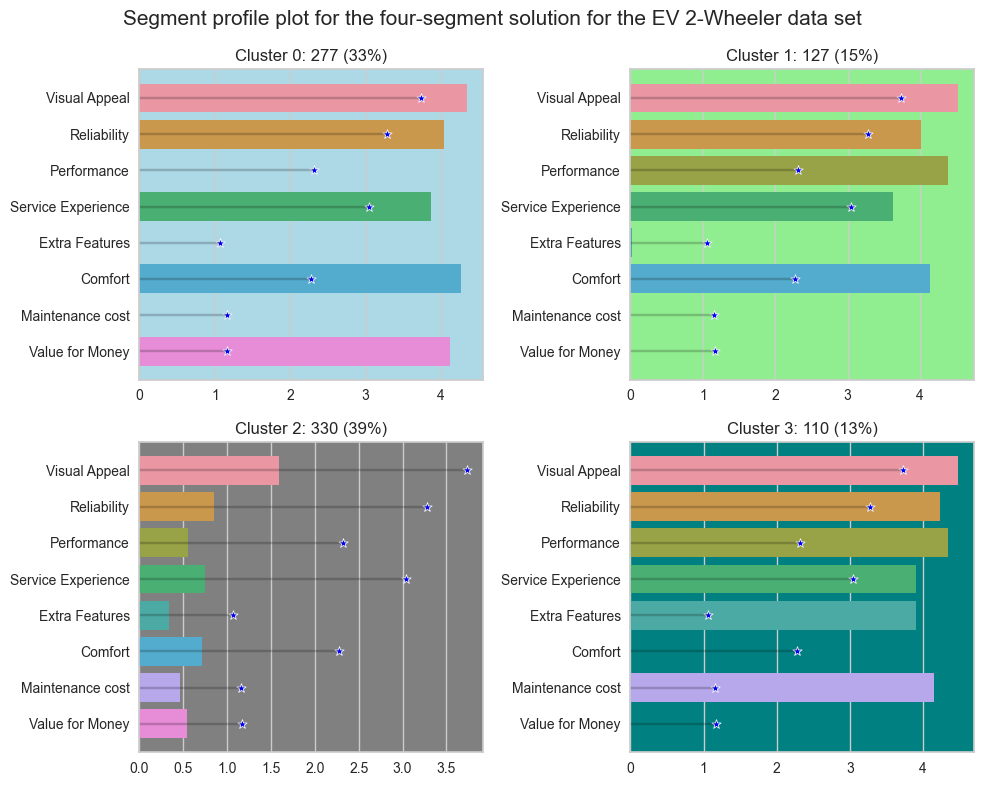

In [91]:
plt.figure(figsize=(10, 8))
colors = ['lightblue', 'lightgreen', 'grey', 'teal']  # Define background colors for each subplot

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    ax.set_facecolor(colors[i])  # Set background color for the subplot
    sns.barplot(data=ev_pivoted_profile, x=i, y=ev_pivoted_profile.index)
    sns.scatterplot(data=ev_mean_pivoted_profile, x='Average value', y='Segments', color='blue', marker="*")
    for index, row in ev_mean_pivoted_profile.iterrows():
        plt.hlines(y=row['Segments'], xmin=0, xmax=row['Average value'], colors='black', alpha=0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {ev_profile['clusters'].value_counts()[i]} ({ev_profile['clusters'].value_counts()[i]*100/len(ev_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize=15)
plt.tight_layout()
plt.savefig("Profile_of_segments.png")
plt.show()

**the visualization gives us lots of insight of the consumers intrests in each of the 4 clusters**

In [92]:
#segement 0 comprising of the 2nd largest cluster of consumers shows that they go for EVs because of 
    #visual appeal, comfort, value for money, reliability.
#segment 1 comprises of 15% of customers, they are satisfied mainly with visual appeal, performance and comfort, and not so
    #impressed with value for money, maintainance cost and added features.
#segment 2 which comprises of the largest no. of consumers (39% of total), they are most dissatisfied among available aspects.
#cluster 3 comprises of 13% consumers the least no. of consumers among all clusters. but they sure have the satisfaction 
    #for most no. of aspects, except for comfort and value for money.

**Visualizing each clusters with respect to PCA**

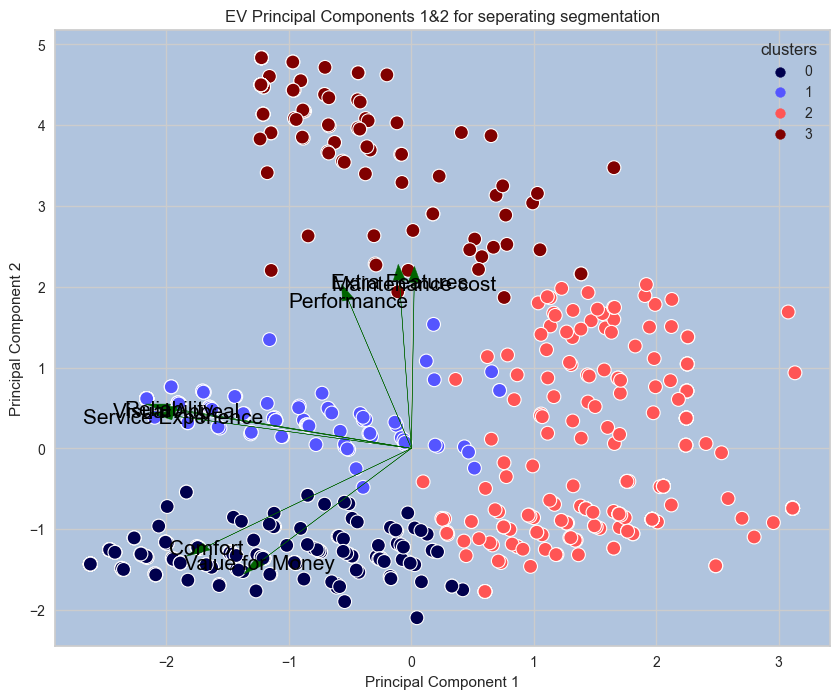

In [93]:
plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('lightsteelblue')

sns.scatterplot(data=ev_pca, x='PCA1', y='PCA2', hue='clusters', palette='seismic', s=100)

#arrows
for i in range(len(ev_pca_factors_load['PCA1'])):
    plt.arrow(0, 0, ev_pca_factors_load['PCA1'][i] * 4, ev_pca_factors_load['PCA2'][i] * 4, head_width=0.1, head_length=0.2, fc='darkgreen', ec='darkgreen')
    plt.text(ev_pca_factors_load['PCA1'][i] * 4, ev_pca_factors_load['PCA2'][i]* 4, ev_pca_factors_load.index[i], fontsize=15, ha='center', color='black', va='center_baseline')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('EV Principal Components 1&2 for seperating segmentation')
plt.grid(True)
plt.savefig("difference_in_segments.png")
plt.show()

In [94]:
# PCA based segment opinions shows Segment 3 is most visible in opinions, contrary to segment2

In [95]:
#The scatter plot above is specifically plotting the data points using only the first two principal components (PCA1 and PCA2). 
#This is a common approach for visualizing high-dimensional data 
#since it's difficult to visualize more than three dimensions effectively in a 2D plot.

#but just for understanding purpose i am plotting all the 8 components of PCA below.

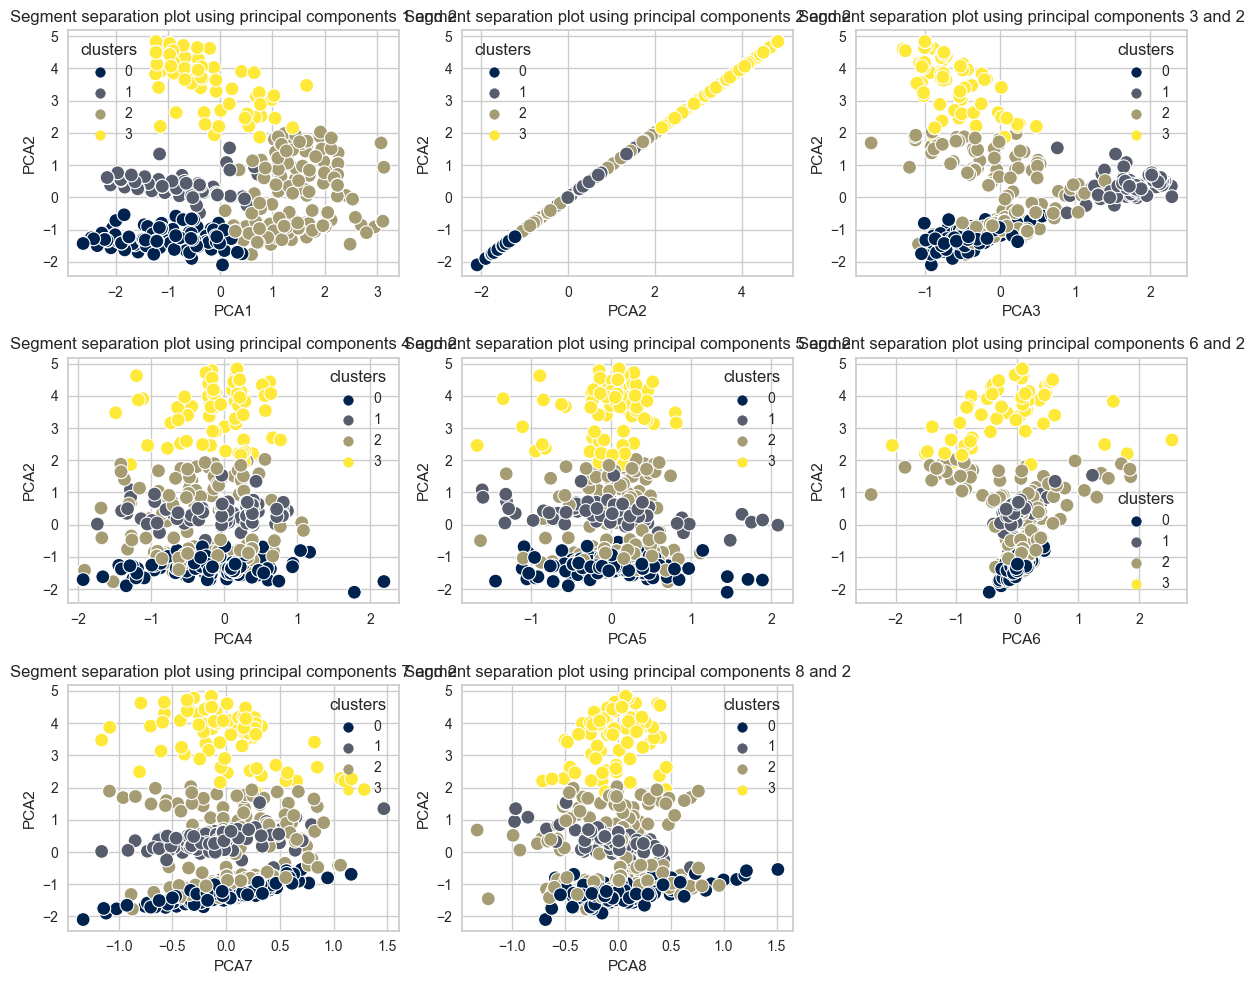

In [96]:
plt.figure(figsize=(12, 10))
plt.gca().set_facecolor('lightgray')

num_pcs = 8 #no. of principal components to visualize

# Loop over each principal component
for i in range(1, num_pcs + 1):
    plt.subplot(3, 3, i)  # Adjust subplot layout as needed
    sns.scatterplot(data=ev_pca, x=f'PCA{i}', y='PCA2', hue='clusters', palette='cividis', s=100)
    plt.xlabel(f'PCA{i}')
    plt.ylabel('PCA2')
    plt.title(f'Segment separation plot using principal components {i} and 2')

plt.tight_layout()
plt.show()

#

# Segments Desription

In [97]:
#adding clusters column into our initial merged dataframe (made up of specs and reviews dataframes)
ev_describe=ev_merged_df
ev_describe["clusters"]=kmeans.labels_ 

In [98]:
ev_describe

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiments,clusters
0,Specification is very good\nFuel save is 300% ...,Everything,Never owned,NaN,5,4.0,4.0,4.0,4.0,5.0,...,NaN,Ampere Magnus EX,104758,121,53,90,7,1200,positive,3
1,Less buying cost.. I bought around 78k... Rang...,Daily Commute,< 3 months,< 5000 kms,4,4.0,3.0,4.0,3.0,3.0,...,NaN,Ampere Magnus EX,104758,121,53,90,7,1200,positive,3
2,1. Buying experience is very excellent\n2. Rid...,Daily Commute,< 3 months,< 5000 kms,5,4.0,NaN,5.0,NaN,4.0,...,NaN,Ampere Magnus EX,104758,121,53,90,7,1200,positive,3
3,The vehicle was not good routine usage. The ba...,Daily Commute,> 1 yr,5000-10000 kms,1,3.0,1.0,2.0,3.0,1.0,...,NaN,Ampere Magnus EX,104758,121,53,90,7,1200,positive,2
4,Recently i have purchased a magnus ex bike fro...,Daily Commute,< 3 months,< 5000 kms,3,4.0,3.0,2.0,NaN,NaN,...,NaN,Ampere Magnus EX,104758,121,53,90,7,1200,positive,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,I have ridded more other electronic bikes... B...,Daily Commute,< 3 months,< 5000 kms,5,5.0,5.0,NaN,5.0,NaN,...,5.0,Yo Drift,51094,60,25,59,8,250,negative,0
840,"Everything ,every brand every product of elect...",Daily Commute,3-6 months,< 5000 kms,1,1.0,1.0,NaN,1.0,NaN,...,1.0,Yo Drift,51094,60,25,59,8,250,negative,2
841,"It's been 3 weeks since I am owning this, and ...",Leisure Rides,< 3 months,< 5000 kms,5,5.0,5.0,NaN,5.0,NaN,...,5.0,Yo Drift,51094,60,25,59,8,250,positive,0
842,"Hey , i am sujan roy from coochbehar .I have b...",Daily Commute,6 months-1 yr,5000-10000 kms,4,4.0,3.0,NaN,4.0,NaN,...,4.0,Yo Drift,51094,60,25,59,8,250,positive,0


In [99]:
# since we have done all the major operations with numerial columns, it is time to analyse the four categorical columns 
# with respect to their relationship with each clusters. 
# these 4 columns are- "Used it for", "Owned for", "Ridden for", and "Sentiment".
# with the help of visualization we will be analysing the relationship these columns share with each cluster.
# we will be doing so to get the insights for describing these segments.

In [100]:
#creating dataframes for each of the 4 categorical columns 
#by creating a cross tabulation of frequencies of data groups with respect to clusters

#Used it for purpose
used_it_for_frequency=pd.crosstab(index=ev_describe.clusters, columns=ev_describe["Used it for"])
#Owned for time duration
owned_for_frequency=pd.crosstab(index=ev_describe.clusters, columns=ev_describe["Owned for"])
#Ridden for distance
ridden_for_frequency=pd.crosstab(index=ev_describe.clusters, columns=ev_describe["Ridden for"])
#Sentiments
sentiments_frequency=pd.crosstab(index=ev_describe.clusters, columns=ev_describe.sentiments)

In [101]:
used_it_for_frequency

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
clusters,,,,,
0,194,55,7,19,2
1,75,39,4,9,0
2,244,47,7,27,5
3,87,19,2,1,1


#

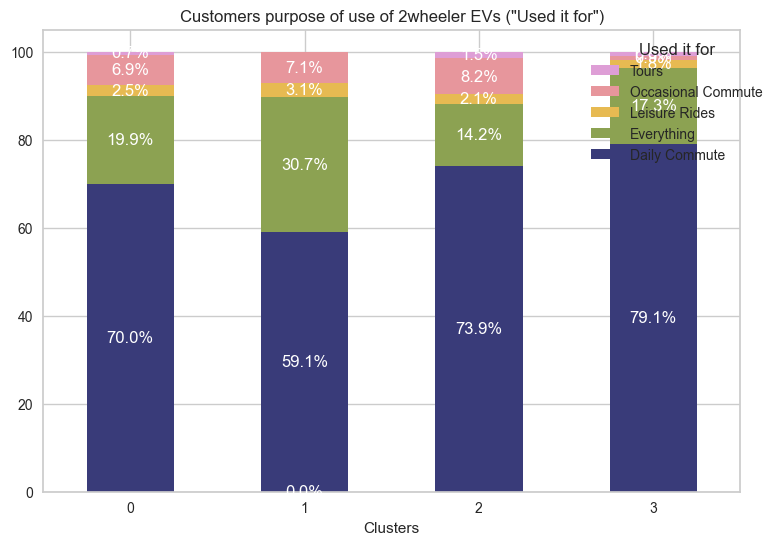

In [109]:
#plotting Used_it_for column

# Calculate percentages
df_percentage = used_it_for_frequency.div(used_it_for_frequency.sum(axis=1), axis=0) * 100

ax = df_percentage.plot(kind='bar', stacked=True, figsize=(9, 6), cmap='tab20b')

# Annotate each stack with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.title('Customers purpose of use of 2wheeler EVs ("Used it for")')
plt.xlabel('Clusters')
ax.set_xticklabels(sentiments_frequency.index, rotation=0)
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), title='Used it for', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("used_it_for")
plt.show()

**Above Stacked Bar chart shows each of the segments of customers used 2 wheeler EV for daily commute, but they hardly used it for tours**

#

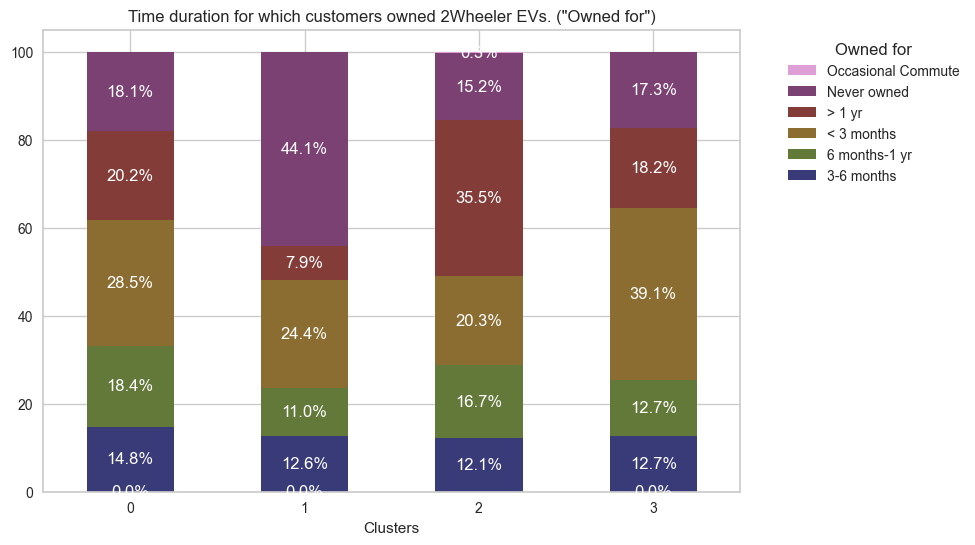

In [103]:
#plotting Owned_for column

# Calculate percentages
df_percentage = owned_for_frequency.div(owned_for_frequency.sum(axis=1), axis=0) * 100

ax = df_percentage.plot(kind='bar', stacked=True, figsize=(9, 6), cmap='tab20b')

# Annotate each stack with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.title('Time duration for which customers owned 2Wheeler EVs. ("Owned for")')
plt.xlabel('Clusters')
ax.set_xticklabels(sentiments_frequency.index, rotation=0)
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), title='Owned for', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("owned_for.png")
plt.show()

**Above visualization shows the duration of 2wheeler EV ownership by customers of each segment. majority of customers in segment 2 owned the vehicle for more than 1 year contrary to segment 1 which shows most customers never owned the vehicle. segment 0 looks kind of equally balanced in all aspects.**

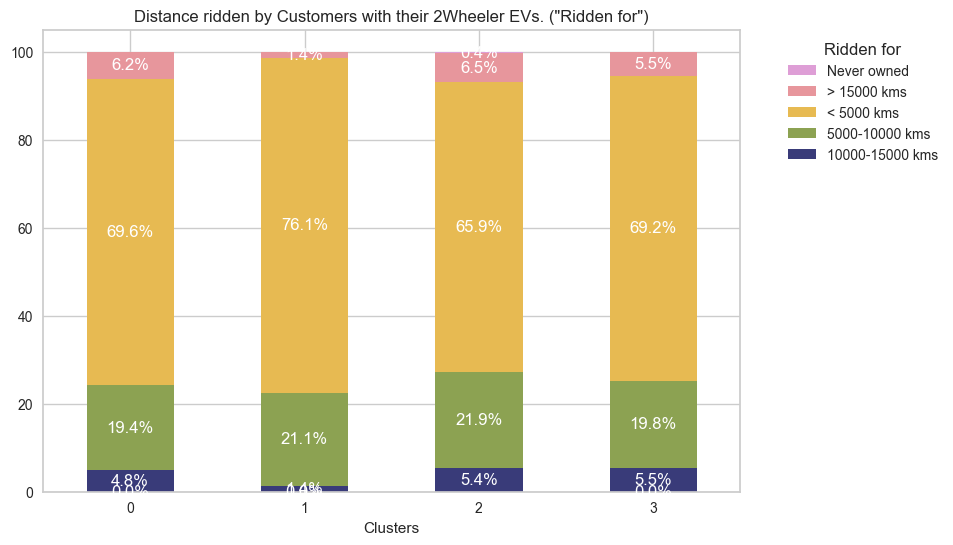

In [104]:
#plotting Ridden_for column

# Calculate percentages
df_percentage = ridden_for_frequency.div(ridden_for_frequency.sum(axis=1), axis=0) * 100

ax = df_percentage.plot(kind='bar', stacked=True, figsize=(9, 6), cmap='tab20b')

# Annotate each stack with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.title('Distance ridden by Customers with their 2Wheeler EVs. ("Ridden for")')
plt.xlabel('Clusters')
ax.set_xticklabels(sentiments_frequency.index, rotation=0)
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), title='Ridden for', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("ridden_for.png")
plt.show()

**above visualization shows distance covered by each customers with their 2wheeler ev. clearly the customers in all clusters who covered the distance of within 5000km are highest in numbers in all these  segments**

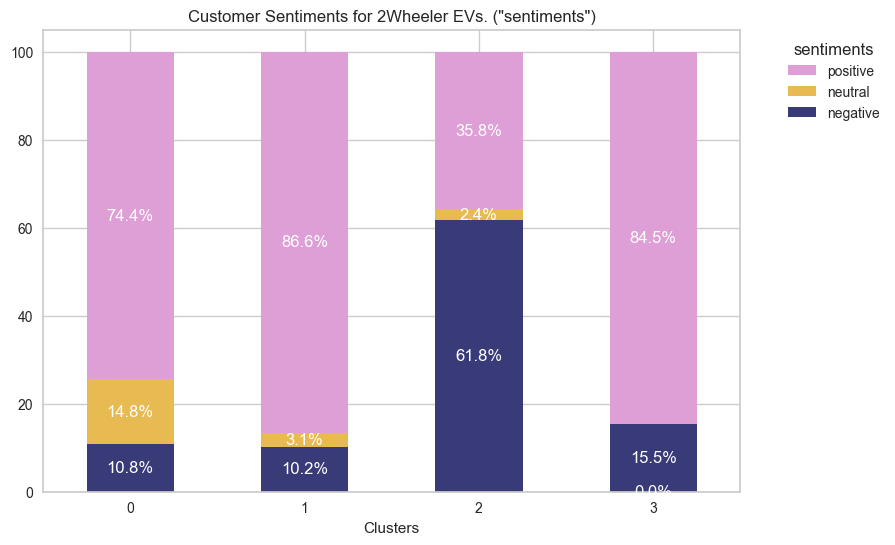

In [105]:
# Calculate percentages
df_percentage = sentiments_frequency.div(sentiments_frequency.sum(axis=1), axis=0) * 100

ax = df_percentage.plot(kind='bar', stacked=True, figsize=(9, 6), cmap='tab20b')

# Annotate each stack with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.title('Customer Sentiments for 2Wheeler EVs. ("sentiments")')
plt.xlabel('Clusters')
ax.set_xticklabels(sentiments_frequency.index, rotation=0)
handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), title='sentiments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("sentiments.png")
plt.show()

**The above visualization shows overall sentiment of customers from each segments for 2Wheeler EVs. although Segment 0,1,3 shows overall positive sentiments towards the 2 wheeler EVs, but segment 2 customers shows highly negative sentiment that portrays their dissatisfactory views. almost 62 percent of customers from segment 2 shows negative sentiments. But regarding other 3 segments, their positive sentiments shows that they are extremely satisfied with the 2 wheeler EVs and their different categories.**

#

**Analysing columns related to the Technical Specification of 2wheeler EVs**

In [106]:
#we have egmentation analysis of each numerical columns in section "Profiling Segments"
#we have done four remaining categorical columns analysis in section "Segments Description where we described each segments"
#now the 6 other columns left for analysis. these are mainly consisting of technical specifications namely-
    #Price
    #Riding Range (km)
    #Top Speed (kmph)
    #Weight
    #Battery charging time (hrs)
    #Rated Power (W)

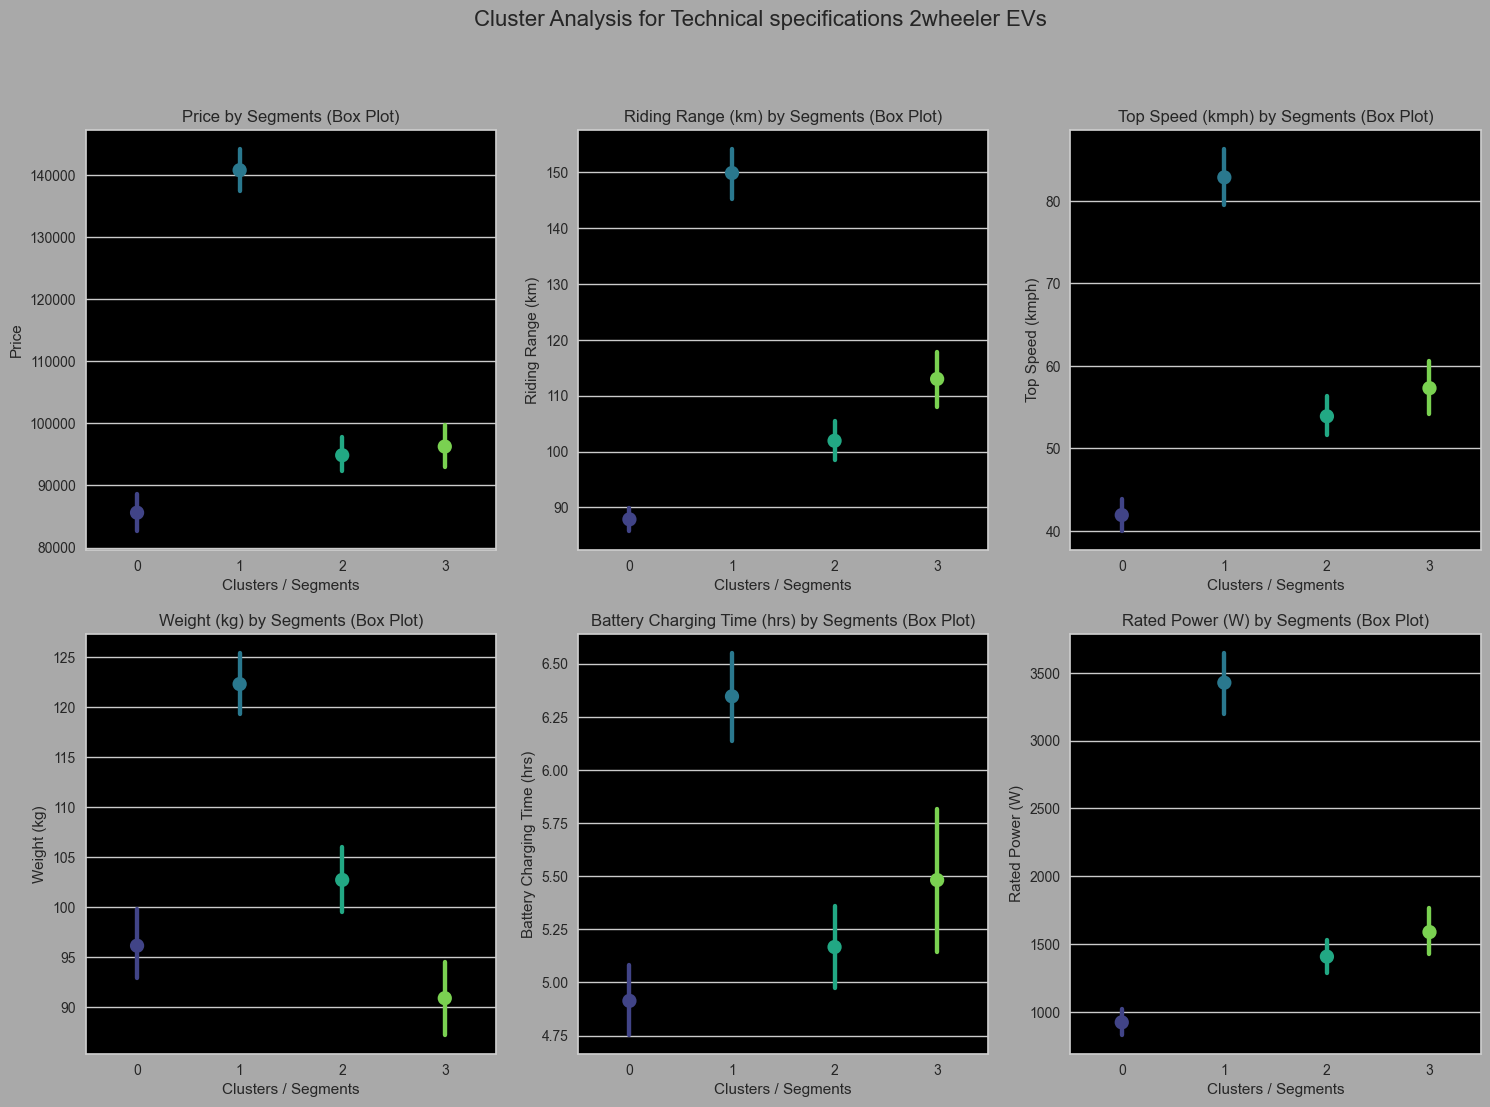

In [107]:
columns_to_plot = ['Price', 'Riding Range (km)', 'Top Speed (kmph)', 'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Set the overall title for the figure
fig.suptitle('Cluster Analysis for Technical specifications 2wheeler EVs', fontsize=16)

# Set background color for the entire figure
fig.patch.set_facecolor('darkgrey')  # Change 'lightblue' to your desired color

# Plot pointplots for each of the 6 technical specification columns
for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.pointplot(x='clusters', y=column, data=ev_describe, ax=ax, palette='viridis')
    ax.set_title(f'{column} by Segments (Box Plot)')
    ax.set_xlabel('Clusters / Segments')
    ax.set_ylabel(column)
    ax.set_facecolor('black')  # Optional: individual subplot background color

# Save the figure
plt.savefig('tech_spec_cluster_analysis.png')

**The above pointplot visualization shows each technical specification columns with preference by each of the 4 segments. it tells us-**

***Segment 0 is those customers seems to be satisfied with their EVs with the lowest specs the market is possibly offering, They seem to like Budget-friendly EV also.***

***Segment 1 definitly is in front in all 6 sections, i.e they prefer high end 2 wheelerEVs with luxery and performance in mind, and it seems they also are the ones that ride for the longest distance.***

***Segment 2 consists of customers who are okay with average specs in their EVs.***

***Segment 3 shows they prefer battery charging time and riding range i.e they also have high need for travelling for long distance like Segment 2 comparatively to other segments.***

#

**Last but not least, Visualising / Describing Segments with respect to "rating" column**

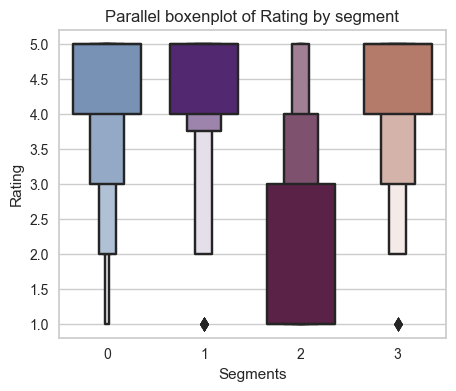

In [108]:
plt.figure(figsize=(5, 4))
sns.boxenplot(ev_describe, x='clusters', y='rating', palette='twilight', width=0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel boxenplot of Rating by segment")
plt.savefig("cust_ev_rating.png")
plt.show()

***Above boxenplot shows ratings with each clusters. it shows segment 0 is stretched with rating range all from 1 to 5 but majority of them gave ratings between 4 to 5. the same goes for sagment 1 and segment 3 i.e. majority lies in the range that gave ratings between 4 and 5. segment 1 has highest percentage of ratings between 4-5. this shows they all are overall satisfied. but segment 2 clearly shows highest dissatisfaction among majority of consumers as we can see above that most of them gave ratings between 1 to 3 only. we need to consider this mainly in developing our marketing approach.***

#

# CONCLUSION

***I first performed analysis on Electric Vehicles types which consist of 4 types of vehicles, namely- 2Wheeler, 3Wheeler, 4Wheeler and buses. i researched and analysed their Sales performance over the period of 2017-2023, the result showed that 2Wheeler EVs were sold the highest among all EV types generating INR 2
464 Cr. 2nd and 3rd in the list are EBuses and 3 Wheelers  generating  INR 687.93 Cr. and INR 321. Cr. respectively. last in the list was 4Wheelers with 114 Cr. revenue generation.*** 


***Here i might have decided to move forward with 4Wheelers in mind to target but I rather chose to move on with 2 Wheelers as the target of my market Segmentation Project because it is always lesser risk in investing and targeting into rising business compared to comparatively slower rising sales of 4Wheelers or other two types in the list. because we are here working with a startup company, and usually things that are in full trend seems more efficient to work with, another factor is the capital part, as we know 2Wheelers demands less input resource, on the other hand working in 3 Wheelers might have been much cheaper but 2 wheelers EV's whopping sales difference is worth considering. so with all these points in mind i decided to segment in 2Wheeler EVs.***


***After this the next step was to identify all the 2Wheeler EV brands active in India.I did this for getting insights of Market Leaders. so i performed analysis on the brands data and found out among 15 major brands, the "Ola Electric 2 wheelers" are highest especially its uptrend from fy21-22 to fy22-23 just skyrocketed. contributing 152.567k to the market.***


***After deciding my target EV segment i.e. 2Wheelers, I dived into Customer Segmentation with their response and review towards various different 2Wheeler EV features.
I used PCA which is helpful in reducing dimension in large datasets. with few of the principal components i derived optimal clusters for our market segmentation as 4 clusters. I achieved this by using KMeans clustering and cluster sum of squares.*** 


***Then i performed segmentation analysis on our final dataset by dividing in 4 sectors. 
1st i performed segmentation analysis on all the numerical columns explored and identified with the help of PCA.
2nd i perfomed analysis on 4  remaining categorical columns namely- "Sentiment", "Purpose it is Used for", "Time duration it is Owned for", " Distance Ridden", and "Sentiment".
then 3rd I performed segmentation analysis on remaining 6 columns which contained technical specification like "Battery charge time", "Price", "Weight", "Top speed", "Riding Range" and "Rated Power". and final analysis i performed on the last remaining column in dataset- "Rating" which consisted values of customer ratings with values from 1 to 5.***


***in all of these analysis and exploration of various Segments I concluded that 2 segments, cluster1 and cluster2 are worth focusing on as our target segmentation. if possible by keeping in mind the resources of the startup both of these can be our target segments as segment 1 consists of those customers who are extremely satiosfied and happy with the product sepcs and features and they even need more as they seems to be willing to pay higher price and have taste in luxary, they consist of 15% of the total market customers. 
then 2nd cluser that is segment 2 consist of customers who need to be introduced with the features and specs that can meet their satisfaction level as they are most dissatisfied by majority of variables(specs & features) and keeping in mind they are the largest consumer group in total ev market consisting of almost 40 % of the total market customer so we cant simply overlook this while deciding our target segments.***

***i achieved these insights by visualizing the data with charts like scatterplot for market opinion of all 4 segments of customers. pointplots for categorical columns analysis, boxenplot for overall ratings of each segments/clusters of customers.***